In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
file = '../data/trajectories.csv'
df = pd.read_csv(file)
trayectories_df = pd.DataFrame(df)

# Fecha del netCDF
dates = trayectories_df['date'].unique()
dates_df = pd.DataFrame(dates, columns=['date'])

fecha = dates_df['date'][2]
path_chlc = '../data/chlc'

In [3]:
filename = f"{path_chlc}/2014/noaacwNPPVIIRSSQchlaMonthly_0fa6_1110_9fdd_U1700614329836.nc"
# If filename exists the open it and get lat, lon and SST, else SST = 'NA'
nc_file = nc.Dataset(filename)
print(nc_file.variables.keys())
# Get lat and lon
lat = nc_file['latitude'][:]
lon = nc_file.variables['longitude'][:]
# Get SST
chlor_a = nc_file['chlor_a'][0][:,:]
chlor_a = chlor_a[0, :, :]
# Close netCDF
nc_file.close()

print('Latitude shape', lat.shape)
print('Longitude shape', lon.shape)
print('Chlor shape', chlor_a.shape)



dict_keys(['time', 'altitude', 'latitude', 'longitude', 'chlor_a'])
Latitude shape (854,)
Longitude shape (1414,)
Chlor shape (854, 1414)


Chlor min 0.001
Chlor max 93.881226


/tmp/ipykernel_422/398999947.py:14: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


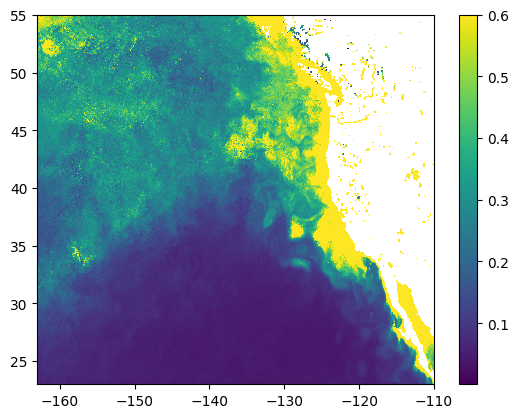

In [7]:
min_lat = 25.933687
max_lat = 51.25798
min_lon = -158.980523
max_lon = -114.42687

#plt.figure(figsize=(12,8))

chlor_a_min = np.nanmin(chlor_a)
chlor_a_max = np.nanmax(chlor_a)
print('Chlor min', chlor_a_min)
print('Chlor max', chlor_a_max)

plt.pcolor(lon, lat, chlor_a, cmap='viridis', vmin=chlor_a.min(), vmax=0.6)
plt.colorbar()
#plt.clim(0,1)
# Zoom in on the data
#plt.xlim(min_lon, max_lon)
#plt.ylim(min_lat, max_lat)
#plt.title(f'Chlorophyll-a concentration on {fecha}')